In [1]:
from protein_sequence import ProteinSequence
from mutation_strategy import MutationStrategy, MinLogitPosSub, BlosumWeightedSub
from evolution import Evolution
from evaluation_strategy import EvaluationStrategy
from model_singleton import ModelSingleton
import esm
from Bio.Align import substitution_matrices

In [2]:
# Source: https://github.com/facebookresearch/esm/tree/main?tab=readme-ov-file#esmfold
model, alphabet = esm.pretrained.load_model_and_alphabet("esm2_t33_650M_UR50D") 
batch_converter = alphabet.get_batch_converter()
blosum80 = substitution_matrices.load("BLOSUM80")

In [3]:
reference_seq = 'TTSAGESADPVTATVENYGGETQVQRRQHTDIAFILDRFVKVKPKEQVNVLDLMQIPAHTLVGALLRTATYYFSDLELAVKHEGDLTWVPNGAPETALDNTTNPTAYHKEPLTRLALPYTAPHRVLATVYNGSSKYGDTSTNNVRGDLQVLAQKAERTLPTSFNFGAIKATRVTELLYRMKRAETYCPRPLLAIQPSDARHKQRIVAPAKQ'

In [4]:
modelSingleton = ModelSingleton(model=model,alphabet=alphabet,batch_converter=batch_converter)

In [5]:
fmd_sequence = ProteinSequence("base",reference_seq)
eval_strat = EvaluationStrategy()
mutation_strat = MinLogitPosSub(mutations_per_seq=2,start_pos=0,end_pos=210)
evolution = Evolution(
    root_sequence = fmd_sequence,
    mutation_strategy = mutation_strat,
    evaluation_strategy = eval_strat,
    max_generations=4)

In [6]:
evolution.evolve_sequence() 

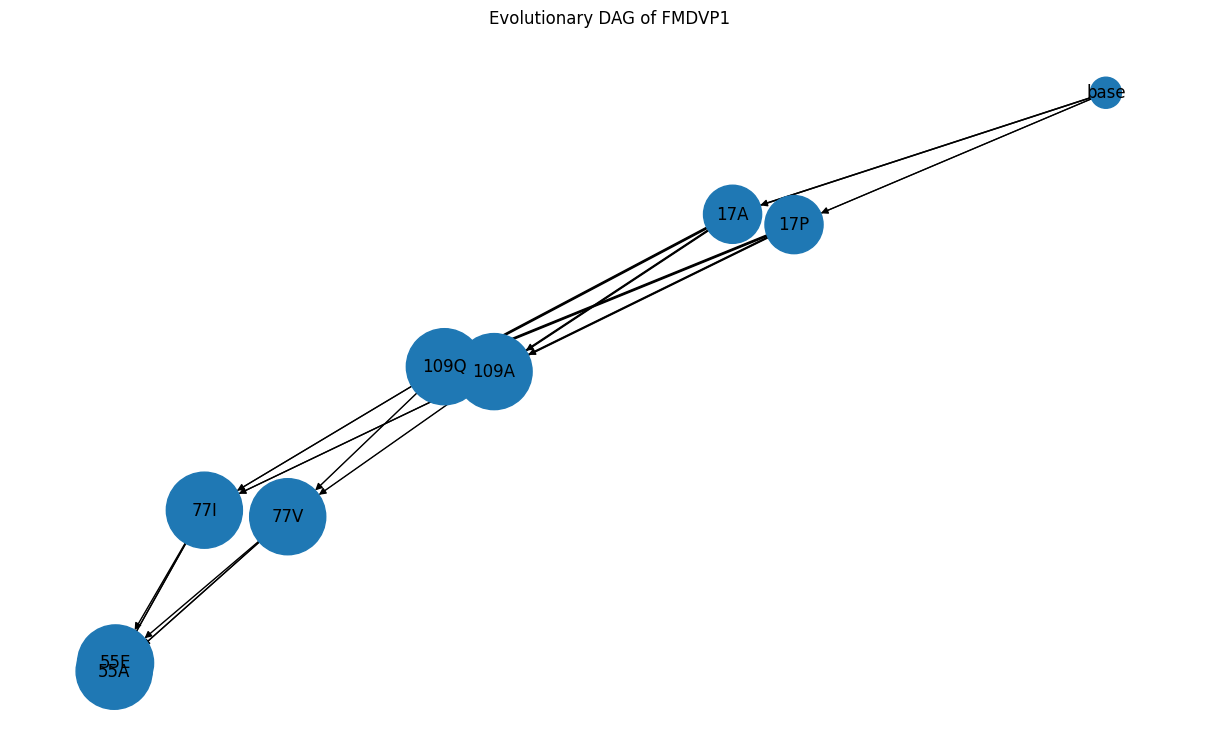

In [7]:
evolution.visualise_evolution_dag()

In [8]:
fmd_sequence = ProteinSequence("base",reference_seq)
eval_strat = EvaluationStrategy()
mutation_strat = MinLogitPosSub(mutations_per_seq=2,start_pos=138,end_pos=143)
evolution = Evolution(
    root_sequence = fmd_sequence,
    mutation_strategy = mutation_strat,
    evaluation_strategy = eval_strat,
    max_generations=4)

In [9]:
evolution.evolve_sequence() 

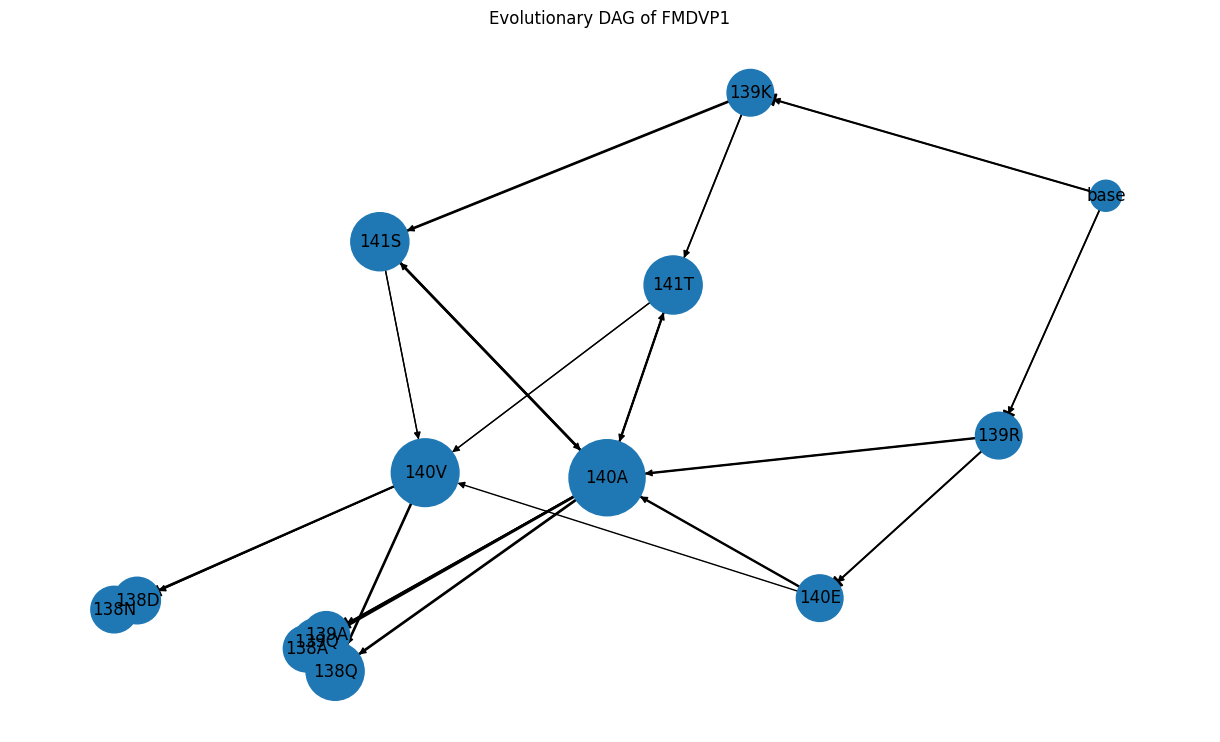

In [10]:
evolution.visualise_evolution_dag()

In [11]:
fmd_sequence = ProteinSequence("base",reference_seq)
eval_strat = EvaluationStrategy()
mutation_strat = BlosumWeightedSub(blosum_matrix=blosum80,multiplier=0.5)
evolution = Evolution(
    root_sequence = fmd_sequence,
    mutation_strategy = mutation_strat,
    evaluation_strategy = eval_strat,
    max_generations=6)

In [12]:
evolution.evolve_sequence()   

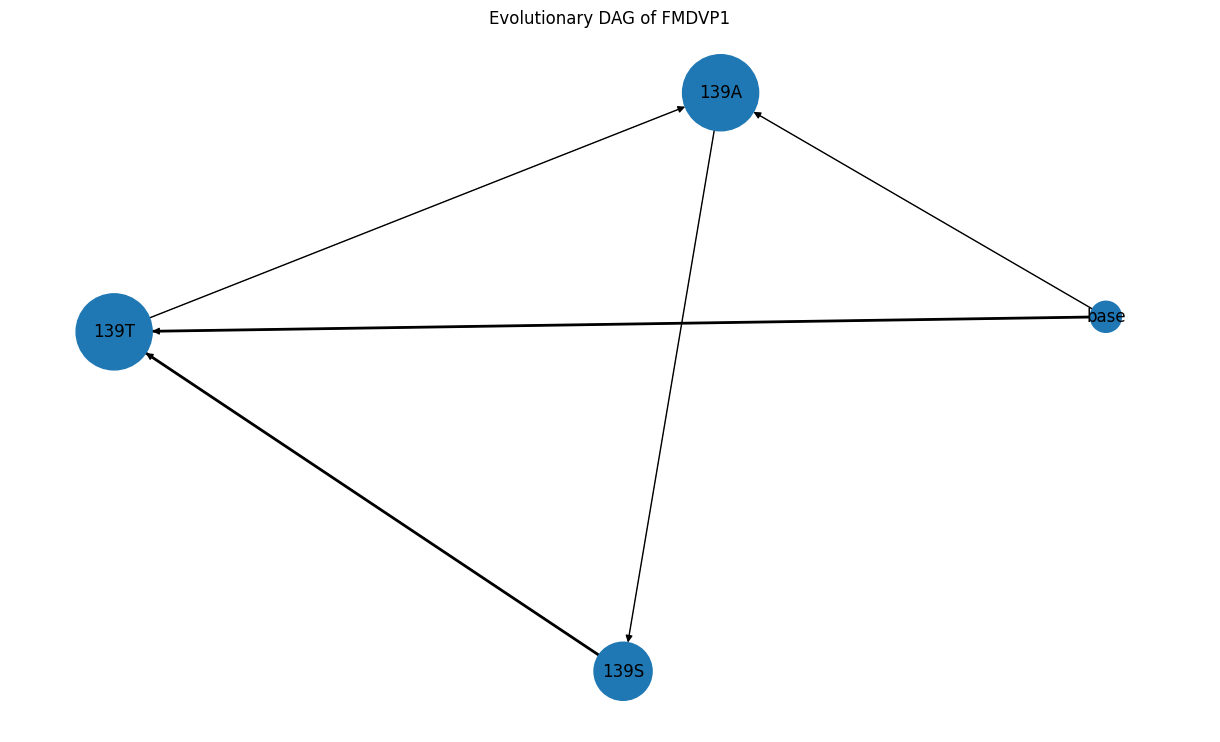

In [13]:
evolution.visualise_evolution_dag()